In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.manifold import TSNE 

In [4]:
# -----------------
#  load the dataset
# -----------------
df = pd.read_csv("dia_clean.csv")
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [9]:
# Features & Target
X = df.drop(["Unnamed: 0", "class"], axis=1)
y = df["class"]
X.head()

,preg,plas,pres,skin,mass,pedi,age
0,6,148.0,72.0,35.0,33.6,0.627,50
1,1,85.0,66.0,29.0,26.6,0.351,31
2,8,183.0,64.0,29.0,23.3,0.672,32
3,1,89.0,66.0,23.0,28.1,0.167,21
4,0,137.0,40.0,35.0,43.1,2.288,33


In [15]:
# Encode target (Yes=1, No=0)
le = LabelEncoder()
y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[ 0.63562555,  0.85747042, -0.02908126,  0.6546113 ,  0.1637904 ,
         0.45063011,  1.42337613],
       [-0.8481755 , -1.20273387, -0.51539072, -0.0125916 , -0.85538075,
        -0.37578585, -0.19485729],
       [ 1.22914597,  2.00202835, -0.67749387, -0.0125916 , -1.33584715,
         0.58537185, -0.10968711],
       [-0.8481755 , -1.07192725, -0.51539072, -0.6797945 , -0.63698693,
        -0.92672983, -1.04655908],
       [-1.14493571,  0.49775221, -2.62273169,  0.6546113 ,  1.54695124,
         5.42409721, -0.02451693]])

In [27]:
# -----------------
# Shuffle Split CV
# -----------------
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train SVM
    svm_clf = SVC(kernel="rbf", C=10, gamma=0.05)
    svm_clf.fit(X_train, y_train)
    print("Train Accuracy:", svm_clf.score(X_train, y_train))
    print("Test Accuracy:", svm_clf.score(X_test, y_test))
    break  # just take first split for visualization


Train Accuracy: 0.8242320819112628
Test Accuracy: 0.7346938775510204


In [45]:
data_tsne = TSNE(n_components=2, perplexity = 30).fit_transform(X_scaled)
data_tsne

array([[ 25.480524 ,   6.1195407],
       [-27.999659 , -12.884777 ],
       [ 24.97183  ,  -2.8914158],
       ...,
       [ -2.4207609,   9.303152 ],
       [  2.0086286,   3.470908 ],
       [-15.048375 , -13.427742 ]], dtype=float32)

In [79]:
# Train again on tsne-transformed data for visualization
svm_vis = SVC(kernel="rbf", C=5, gamma = 0.05)
svm_vis.fit(data_tsne, y)

# Create meshgrid
x_min, x_max = data_tsne[:,0].min()-1, data_tsne[:,0].max()+1
y_min, y_max = data_tsne[:,1].min()-1, data_tsne[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


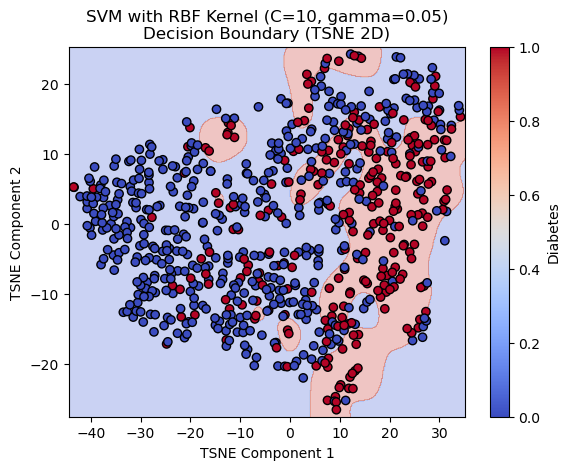

In [81]:
# -----------------
# Plot Decision Boundary
# -----------------
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
plt.title("SVM with RBF Kernel (C=10, gamma=0.05)\nDecision Boundary (TSNE 2D)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(label="Diabetes")
plt.show()